# Lending Club Case Study
## Exploratory Data Analysis

## Problem Statement

Given the loan dataset from Lending Club, we need to find the driving patterns/driving variables for Defaulters

## We will be doing the EDA in below steps for the Lending Club's loan dataset

1. Data Initialization
2. Data Cleansing
3. Data Visualization
4. Final Observations
5. Driving Patterns/Variables

## Data Initialization - Importing Libraries & Reading from CSV
### Importing Libraries

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the csv file into a dataframe

In [415]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Setting options for viewing all rows and columns

In [416]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

In [417]:
#Checking shape
df.shape

(39717, 111)

### Setting options for viewing limited rows and columns for better viewing

In [555]:
pd.set_option('display.max_rows', 12)  
pd.set_option('display.max_columns', 15)

In [419]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data cleansing 
### Checking nulls and Removing columns with only nulls

In [420]:
dfnulls = df.isnull().mean()*100
dfnulls[dfnulls==100]

mths_since_last_major_derog    100.0
annual_inc_joint               100.0
dti_joint                      100.0
verification_status_joint      100.0
tot_coll_amt                   100.0
                               ...  
percent_bc_gt_75               100.0
tot_hi_cred_lim                100.0
total_bal_ex_mort              100.0
total_bc_limit                 100.0
total_il_high_credit_limit     100.0
Length: 54, dtype: float64

In [421]:
#Dropping columns with only null columns
df.dropna(axis=1, how='all', inplace=True)

In [422]:
#Checking shape
df.shape

(39717, 57)

### Removing columns with nulls more than 90%

In [423]:
#Checking if any columns have more than 90% of nulls
dfnulls = df.isnull().mean()*100
dfnulls[dfnulls>=90]

mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64

In [424]:
#Dropping columns with more than 90% null columns
df.drop(['mths_since_last_record', 'next_pymnt_d'], axis =1, inplace=True)

In [425]:
#Checking shape
df.shape

(39717, 55)

In [426]:
#Checking the columns with nulls
dfnulls = df.isnull().mean()*100
dfnulls[dfnulls>0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
                                ...    
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
Length: 12, dtype: float64

### Removing single valued columns

In [427]:
#Checking if any columns have single valued as they don't give any scope for analysis
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [428]:
#Checking the single valued columns data
for col in constant_columns:
    print(col,':' ,df[col].unique())

pymnt_plan : ['n']
initial_list_status : ['f']
collections_12_mths_ex_med : [ 0. nan]
policy_code : [1]
application_type : ['INDIVIDUAL']
acc_now_delinq : [0]
chargeoff_within_12_mths : [ 0. nan]
delinq_amnt : [0]
tax_liens : [ 0. nan]


In [429]:
#Dropping the columns with single valued data
df.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type',
'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1, inplace=True)

In [430]:
#checking the shape again
df.shape

(39717, 46)

In [431]:
#checking the columns and data type
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
                            ...   
collection_recovery_fee    float64
last_pymnt_d                object
last_pymnt_amnt            float64
last_credit_pull_d          object
pub_rec_bankruptcies       float64
Length: 46, dtype: object

### Removing columns which aren't driving the EDA

In [432]:
#Upon checking the dtypes, we can see that id, memberid, and url are unique for each loan,
#and doesn't impact the anlaysis
df.drop(['id','member_id','url'], axis=1, inplace=True)

In [433]:
#checking shape
df.shape

(39717, 43)

In [434]:
#Checking to see if data for title,purpose,desc. If they looks similar we can drop one with least nulls
df[['title','desc','purpose']].head(30)

,title,desc,purpose
0,Computer,Borrower added on 12/22/11 > I need to upgra...,credit_card
1,bike,Borrower added on 12/22/11 > I plan to use t...,car
2,real estate business,NaN,small_business
3,personel,Borrower added on 12/21/11 > to pay for prop...,other
4,Personal,Borrower added on 12/21/11 > I plan on combi...,other
...,...,...,...
25,No more credit card debt!,NaN,credit_card
26,consolidation,Borrower added on 12/15/11 > looking to cons...,debt_consolidation
27,Other,Borrower added on 12/16/11 > I have a stable...,other
28,Debt Consolidation,NaN,debt_consolidation


In [435]:
#As data looks similar,  lets check for nulls
df[['title','desc','purpose']].isnull().mean()*100

title       0.027696
desc       32.580507
purpose     0.000000
dtype: float64

In [436]:
#Dropping title,desc as they've nulls and retaining purpose as it's with no nulls
df.drop(['title','desc'], axis=1, inplace=True)

In [437]:
#checking shape
df.shape

(39717, 41)

In [438]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
                            ...   
collection_recovery_fee    float64
last_pymnt_d                object
last_pymnt_amnt            float64
last_credit_pull_d          object
pub_rec_bankruptcies       float64
Length: 41, dtype: object

In [439]:
#Based on the data dictionary, we can drop funded_amnt_inv and retain funded_amnt. 
#As funded_amnt_inv is also included in funded_amnt
df.drop('funded_amnt_inv', axis=1, inplace=True)

In [440]:
#Based on the data dictionary, we can drop total_pymnt_inv and retain total_pymnt. 
#As total_pymnt_inv is also included in funded_amnt
df.drop('total_pymnt_inv', axis=1, inplace=True)

In [441]:
df.shape

(39717, 39)

In [442]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
term                        object
int_rate                    object
installment                float64
                            ...   
collection_recovery_fee    float64
last_pymnt_d                object
last_pymnt_amnt            float64
last_credit_pull_d          object
pub_rec_bankruptcies       float64
Length: 39, dtype: object

### Converting the columns dtype accordingly
#### checking int_rate, term

In [443]:
#Converting the dtypes of int_rate, and term to numeric type
df['term'] = df['term'].str.replace(' months','').astype(int)
df['int_rate'] = df['int_rate'].str.replace('%','').astype(float)

In [444]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
term                         int64
int_rate                   float64
installment                float64
                            ...   
collection_recovery_fee    float64
last_pymnt_d                object
last_pymnt_amnt            float64
last_credit_pull_d          object
pub_rec_bankruptcies       float64
Length: 39, dtype: object

In [445]:
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [446]:
df[df['int_rate']>11].loan_status.value_counts()

Fully Paid     17910
Charged Off     4343
Current          964
Name: loan_status, dtype: int64

#### Checking the revol_util, emp_length columns
As emp_length is an object, we have to change it to numeric

In [447]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
             ... 
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, Length: 11, dtype: int64

In [448]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [449]:
df['emp_length'].isnull().sum()

1075

In [450]:
#Converting emp_length
emp_length_mapping = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}

df['emp_length'] = df['emp_length'].replace(emp_length_mapping)

In [451]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
term                         int64
int_rate                   float64
installment                float64
                            ...   
collection_recovery_fee    float64
last_pymnt_d                object
last_pymnt_amnt            float64
last_credit_pull_d          object
pub_rec_bankruptcies       float64
Length: 39, dtype: object

In [452]:
df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [453]:
#converting revol_util to float/numeric
df['revol_util'] = df['revol_util'].str.replace('%','').astype(float)

In [454]:
df['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [455]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
term                         int64
int_rate                   float64
installment                float64
                            ...   
collection_recovery_fee    float64
last_pymnt_d                object
last_pymnt_amnt            float64
last_credit_pull_d          object
pub_rec_bankruptcies       float64
Length: 39, dtype: object

#### Dealing with date fields issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d

In [456]:
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,May-16
1,Dec-11,Apr-99,Apr-13,Sep-13
2,Dec-11,Nov-01,Jun-14,May-16
3,Dec-11,Feb-96,Jan-15,Apr-16
4,Dec-11,Jan-96,May-16,May-16


In [457]:
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].dtypes

issue_d               object
earliest_cr_line      object
last_pymnt_d          object
last_credit_pull_d    object
dtype: object

In [458]:
#Converting the fields to date fields
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [459]:
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].dtypes

issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

In [460]:
df.dtypes

loan_amnt                           int64
funded_amnt                         int64
term                                int64
int_rate                          float64
installment                       float64
                                ...      
collection_recovery_fee           float64
last_pymnt_d               datetime64[ns]
last_pymnt_amnt                   float64
last_credit_pull_d         datetime64[ns]
pub_rec_bankruptcies              float64
Length: 39, dtype: object

### Derive Extra Date Columns as needed from the given data
#### deriving Closing_date from issue_date and term as inputs

In [461]:
df['closing_date'] = df.apply(lambda row: row['issue_d'] + pd.DateOffset(months=row['term']), axis=1)
df['closing_date'].head()

0   2014-12-01
1   2016-12-01
2   2014-12-01
3   2014-12-01
4   2016-12-01
Name: closing_date, dtype: datetime64[ns]

### Outlier Treatment for Numeric fields

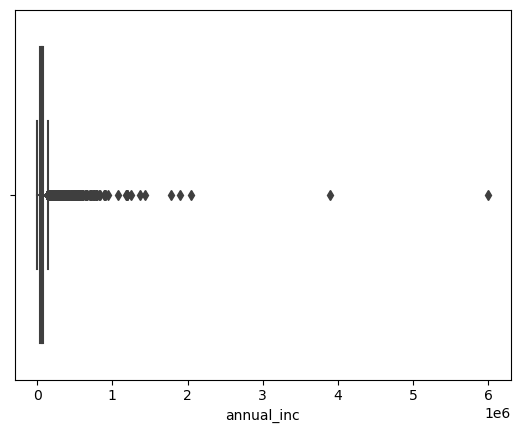

In [462]:
#checking for annual_inc - visualizing in boxplot
sns.boxplot(df['annual_inc'])
plt.show()

In [463]:
#We can see outliers, so let's get the data description as per quartiles
print('0.25',df.annual_inc.quantile(0.25))
print('0.50',df.annual_inc.quantile(0.50))
print('0.75',df.annual_inc.quantile(0.75))
print('0.90',df.annual_inc.quantile(0.90))
print('0.95',df.annual_inc.quantile(0.95))
print('0.97',df.annual_inc.quantile(0.97))
print('0.98',df.annual_inc.quantile(0.98))
print('1',df.annual_inc.quantile(1))

0.25 40404.0
0.50 59000.0
0.75 82300.0
0.90 116000.0
0.95 142000.0
0.97 165757.9199999984
0.98 187000.0
1 6000000.0


In [464]:
df.annual_inc.quantile(0.75)*1.5

123450.0

In [465]:
#Removing the extreme outliers which are greater than 95%
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

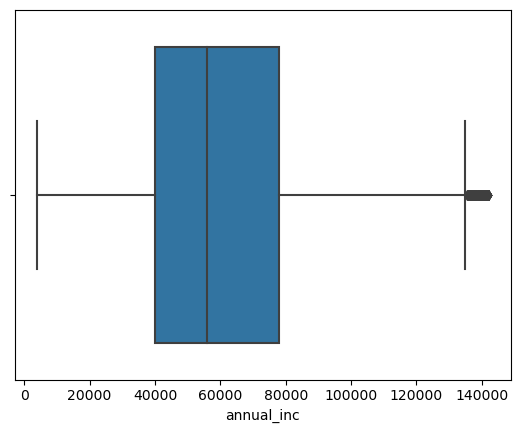

In [466]:
#checking again
sns.boxplot(df['annual_inc'])
plt.show()

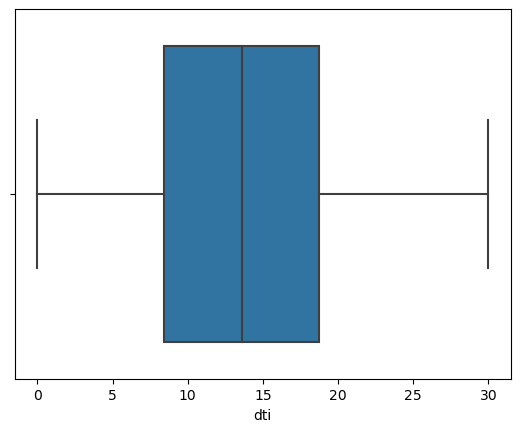

In [467]:
#checking for dti
sns.boxplot(df.dti)
plt.show()

dti looks okay, no need of treatment

In [468]:
df.loan_amnt.head()

0     5000
1     2500
2     2400
3    10000
4     3000
Name: loan_amnt, dtype: int64

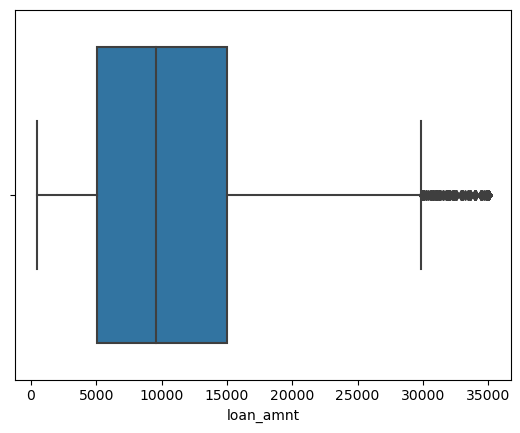

In [469]:
#checking for loan_amnt
sns.boxplot(data=df, x='loan_amnt')
plt.show()

In [470]:
#We can see outliers, so let's get the data description as per quartiles
print('0.25',df.loan_amnt.quantile(0.25))
print('0.50',df.loan_amnt.quantile(0.50))
print('0.75',df.loan_amnt.quantile(0.75))
print('0.90',df.loan_amnt.quantile(0.90))
print('0.95',df.loan_amnt.quantile(0.95))
print('0.97',df.loan_amnt.quantile(0.97))
print('0.98',df.loan_amnt.quantile(0.98))
print('1',df.loan_amnt.quantile(1))

0.25 5075.0
0.50 9600.0
0.75 15000.0
0.90 20495.000000000073
0.95 25000.0
0.97 27000.0
0.98 30000.0
1 35000.0


#### The data looks good and continuous so no need of treatment

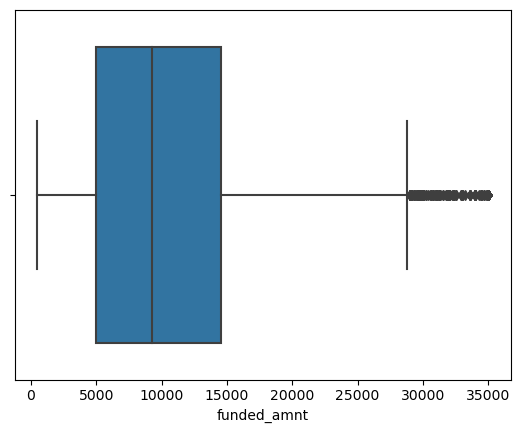

In [471]:
#checking for funded_amnt
sns.boxplot(data=df, x='funded_amnt')
plt.show()

#### The data looks good and continuous so no need of treatment

## Data Visualization

### loan_status

In [472]:
#Visualize the Loan_Status data
df.loan_status.value_counts()

Fully Paid     31268
Charged Off     5421
Current         1054
Name: loan_status, dtype: int64

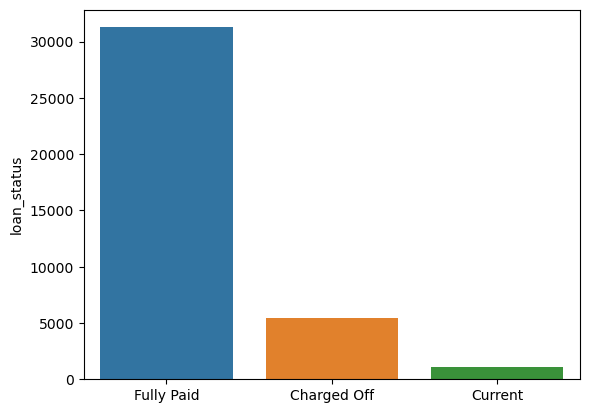

In [473]:
sns.barplot(x=df.loan_status.value_counts().index, y=df.loan_status.value_counts())
plt.show()

##### Observation: Looks like Charged Off accounts are 1/7th of the other two combined

### grade, sub_grade

In [474]:
#Visualize the grade & sub_grade for the charged off accounts

df.sub_grade = pd.to_numeric(df['sub_grade'].apply(lambda x: x[-1]))


In [475]:
df.sub_grade.tail(10)

39704    1
39705    2
39708    5
39709    4
39710    2
39711    1
39712    4
39713    1
39714    4
39716    2
Name: sub_grade, dtype: int64

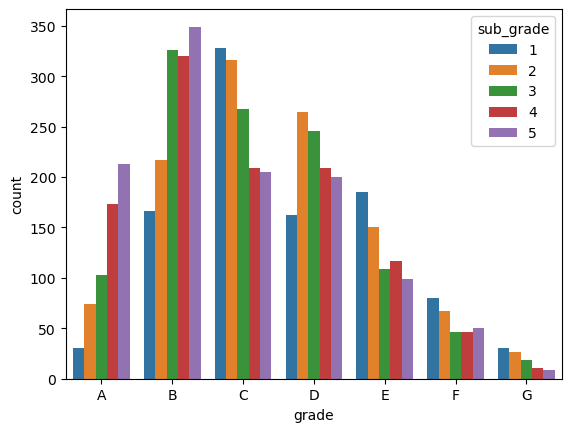

In [476]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='grade', order=['A','B','C','D','E','F','G'],hue='sub_grade')
plt.show()

##### Observation: Records with grades and sub-grades B,C have more charged off accounts

### grade

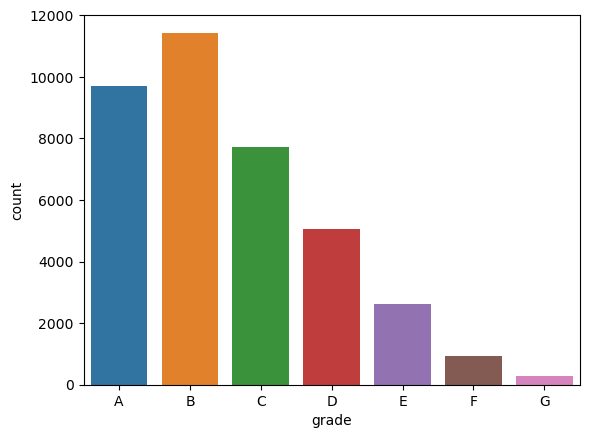

In [477]:
#Visualize grade for Charged Off Accounts
sns.countplot(data=df, x='grade', order=['A','B','C','D','E','F','G'])
plt.show()

##### Observation: More charged_off accounts are with B, A grades respectively

### emp_title

In [478]:
df.emp_title.value_counts()

US Army                          131
Bank of America                  108
AT&T                              58
USAF                              54
IBM                               53
                                ... 
Metroplitan Police Department      1
Sporty's Pub                       1
Elementum Inc                      1
Woodridge School District #68      1
Evergreen Center                   1
Name: emp_title, Length: 27617, dtype: int64

#### emp_title has data that has similar data so repalcing for few US Army and USPS

In [479]:
df['emp_title'] = df['emp_title'].replace('US Army','US ARMY')
df['emp_title'] = df['emp_title'].replace('U.S. Army','US ARMY')
df['emp_title'] = df['emp_title'].replace('US Postal Service','USPS')

In [480]:
dftitle = df[df['loan_status']=='Charged Off'].emp_title.value_counts()

In [481]:
dftitle

US ARMY                                 31
Bank of America                         20
Walmart                                 14
USPS                                    14
UPS                                     12
                                        ..
pizza hut                                1
Boehringer Ingelheim Pharmaceuticals     1
commonwealth of pennsylvania             1
Harris Bank                              1
Invision Power Services                  1
Name: emp_title, Length: 4478, dtype: int64

In [482]:
dftitle = dftitle[dftitle>6]
dftitle

US ARMY              31
Bank of America      20
Walmart              14
USPS                 14
UPS                  12
AT&T                 12
Target                7
Kaiser Permanente     7
Name: emp_title, dtype: int64

In [483]:
df[(df['loan_status']=='Charged Off') & (df['emp_title'].isin(dftitle.index))]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,closing_date
435,20000,20000,60,16.77,494.59,D,2,...,1525.730000,268.0326,2014-11-01,494.59,2016-04-01,0.0,2016-12-01
910,2200,2200,36,9.91,70.90,B,1,...,0.000000,0.0000,2012-06-01,50.00,2016-05-01,0.0,2014-12-01
1037,20300,20300,60,14.27,475.20,C,2,...,12.220000,2.1996,2015-07-01,475.20,2016-04-01,0.0,2016-12-01
1089,10050,10050,60,17.27,251.23,D,3,...,1096.450000,193.2300,2014-02-01,53.52,2014-03-01,0.0,2016-12-01
1234,8400,8400,36,7.51,261.34,A,3,...,271.020000,2.9200,2012-03-01,261.34,2012-08-01,0.0,2014-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36185,20000,20000,36,11.89,663.28,B,4,...,4493.300000,1381.4454,NaT,0.00,2009-12-01,0.0,2012-07-01
36605,9000,9000,36,14.11,308.06,D,1,...,9.160000,3.5500,2010-09-01,308.06,2016-05-01,0.0,2012-05-01
37674,12000,12000,36,13.16,405.25,C,3,...,221.600000,2.2700,2011-01-01,405.25,2011-06-01,0.0,2012-01-01
38341,5000,5000,36,11.78,165.55,C,1,...,376.486183,133.0300,2011-09-01,250.00,2016-05-01,0.0,2011-10-01


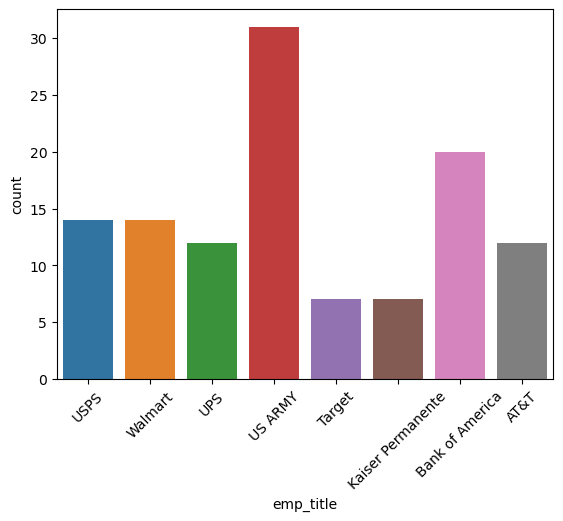

In [484]:
sns.countplot(data=df[(df['loan_status']=='Charged Off') & (df['emp_title'].isin(dftitle.index))], x='emp_title')
plt.xticks(rotation=45)
plt.show()

##### Observation: Not much but can say from above graph that emp_title as US Army has more charged off accounts

### Let's visualize the home_ownership

In [485]:
df[df['loan_status']=='Charged Off'].home_ownership.value_counts()

RENT        2773
MORTGAGE    2197
OWN          434
OTHER         17
Name: home_ownership, dtype: int64

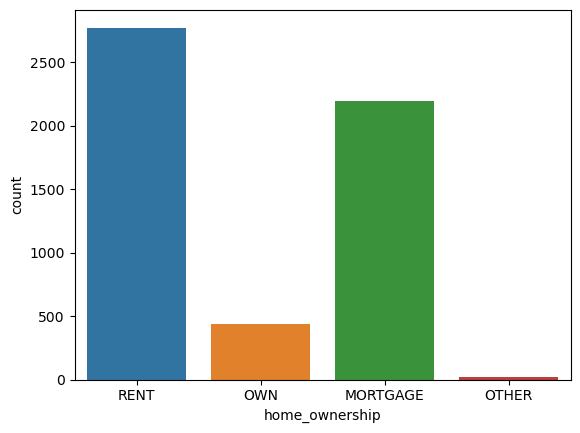

In [486]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='home_ownership')
plt.show()

##### Observation: We can see that loan takers with home ownership as Rent and mortgage looks to default more than others

### Let's visualize the purpose column

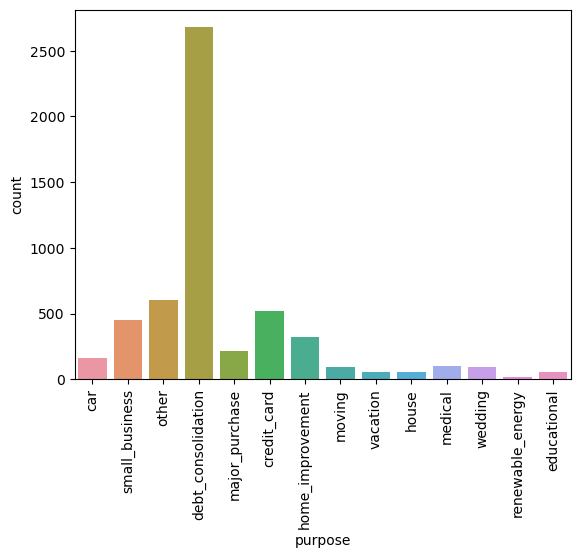

In [487]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='purpose')
plt.xticks(rotation=90)
plt.show()

##### Observation: It looks like puprose with debt_consolidation has higher charge off accounts

### zip_code

In [488]:
#Analyze zip_code
df.zip_code.head(1)

0    860xx
Name: zip_code, dtype: object

In [489]:
df.head(1)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,closing_date
0,5000,5000,36,10.65,162.87,B,2,...,0.0,0.0,2015-01-01,171.62,2016-05-01,0.0,2014-12-01


##### Observation:As Zip_code is masked it's of no use to our analysis and also it's encoded data, let's drop it

In [490]:
df.drop('zip_code', axis=1, inplace=True)

### addr_state

In [491]:
#Analyze addr_state
df_state = df.addr_state.value_counts()
df_state

CA    6702
NY    3573
FL    2736
TX    2537
NJ    1728
      ... 
IN       9
IA       5
NE       5
ID       5
ME       3
Name: addr_state, Length: 50, dtype: int64

In [492]:
df_state = df_state[df_state>500]
df_state

CA    6702
NY    3573
FL    2736
TX    2537
NJ    1728
      ... 
NC     755
MI     698
CT     696
MO     664
MN     598
Name: addr_state, Length: 20, dtype: int64

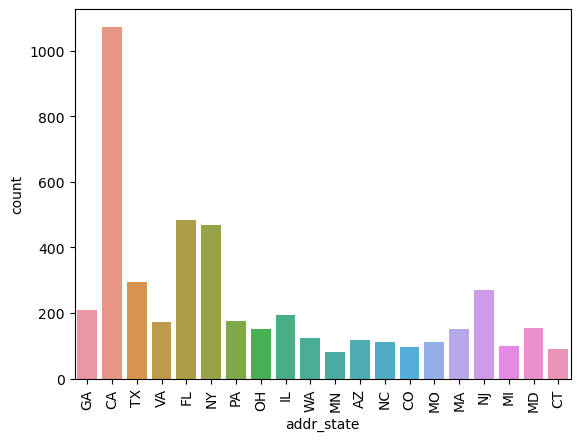

In [493]:
sns.countplot(data=df[(df['loan_status']=='Charged Off') & (df['addr_state'].isin(df_state.index))], x='addr_state')
plt.xticks(rotation=90)
plt.show()

##### Observation: People who live in states in order California, Florida, New York, and New Jersey tend to default more than others

### emp_length

In [494]:
# check for emp_length
df.emp_length.value_counts()

10.0    8247
0.0     4400
2.0     4196
3.0     3906
4.0     3292
        ... 
1.0     3113
6.0     2133
7.0     1702
8.0     1385
9.0     1185
Name: emp_length, Length: 11, dtype: int64

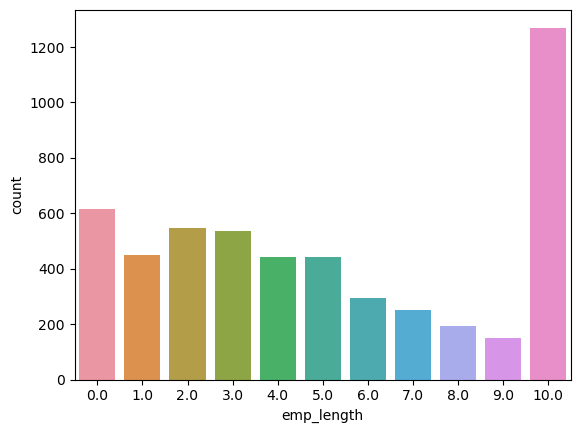

In [495]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='emp_length')
plt.show()

##### Observation: Records with their employment length greater than 10 years are more prone to default than others

### term

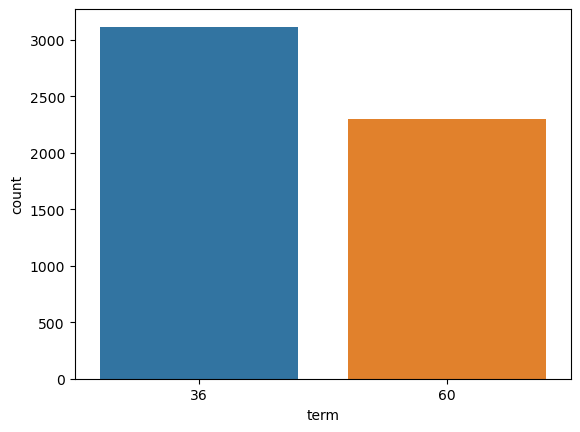

In [496]:
#Checking the term for the charged off accounts
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='term' )
plt.show()

##### Observation: More defaulters took loan with less term i.e, 36 months rather than 60 months, not fully logical yet

### int_rate

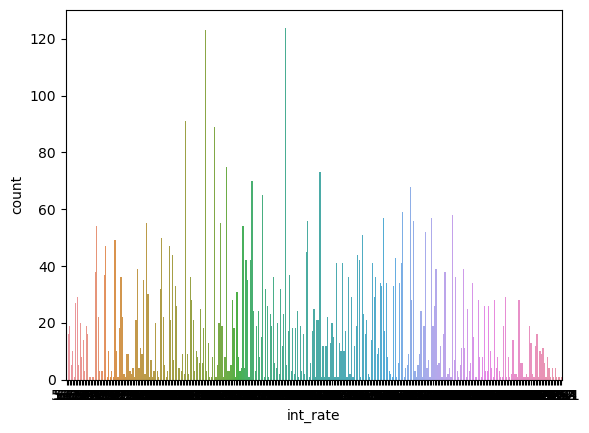

In [497]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='int_rate' )
plt.show()

#### Let's group the int_rate into bins and visualize it

In [498]:
df.int_rate.min()

5.42

In [499]:
df.int_rate.max()

24.4

In [500]:
df.int_rate.describe()

count    37743.000000
mean        11.972018
std          3.697599
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [501]:
df['int_rate'].head(10)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
5     7.90
6    15.96
7    18.64
8    21.28
9    12.69
Name: int_rate, dtype: float64

In [502]:
#binning int_rate into 5 bins
df['int_rate_b'] = pd.cut(df['int_rate'], bins=5, labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df['int_rate_b'].head(10)

0     9%-13%
1    13%-17%
2    13%-17%
3    13%-17%
4     9%-13%
5      5%-9%
6    13%-17%
7    17%-21%
8    21%-24%
9     9%-13%
Name: int_rate_b, dtype: category
Categories (5, object): ['5%-9%' < '9%-13%' < '13%-17%' < '17%-21%' < '21%-24%']

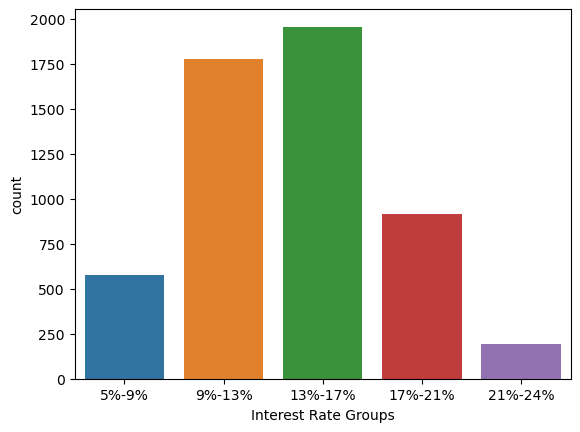

In [503]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='int_rate_b')
plt.xlabel('Interest Rate Groups')
plt.show()

##### Observation: loan takers with interest rate between 13%-17% are higher with defaulters than others

In [504]:
df.dtypes

loan_amnt                        int64
funded_amnt                      int64
term                             int64
int_rate                       float64
installment                    float64
                             ...      
last_pymnt_amnt                float64
last_credit_pull_d      datetime64[ns]
pub_rec_bankruptcies           float64
closing_date            datetime64[ns]
int_rate_b                    category
Length: 40, dtype: object

### Based on the data we can  bin open_acc, annual_inc, revol_util, total_acc, dti and total_rec_late_fee into bins and visualize for any patterns

In [506]:
# open_acc
df['open_acc_b'] = pd.cut(df['open_acc'], bins=6, labels=['2-9', '10-18', '19-27', '28-36', '37-44', '45+'])

# revol_util
df['revol_util_b'] = pd.cut(df['revol_util'], bins=6, labels=['0-16.67', '16.67-33.33', '33.33-50.00', '50.00-66.67', '66.67-83.33', '83.33-100.00'])

# total_acc
df['total_acc_b'] = pd.cut(df['total_acc'], bins=6, labels=['2-18', '19-35', '36-52', '53-69', '70-86', '87+'])

# annual_inc
df['annual_inc_b'] = pd.cut(df['annual_inc'], bins=6, labels=['3k-27k', '27k-52k', '52k-77k', '77k-102k', '102k-127k', '127k+'])

# total_rec_late_fee
df['total_rec_late_fee_b'] = pd.cut(df['total_rec_late_fee'], bins=6, precision=0,labels=['0-30', '31-60', '61-90', '91-120', '121-150', '151-180'])

# dti
df['dti_b'] = pd.cut(df['dti'], bins=5,labels=['0-6','6-12','12-18','18-24','24-30'])


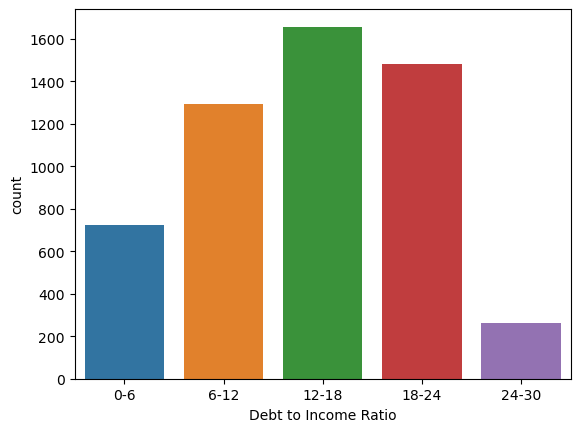

In [507]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='dti_b')
plt.xlabel('Debt to Income Ratio')
plt.show()

##### Observation: dti with 12-18 has most chraged off accounts/defaulters

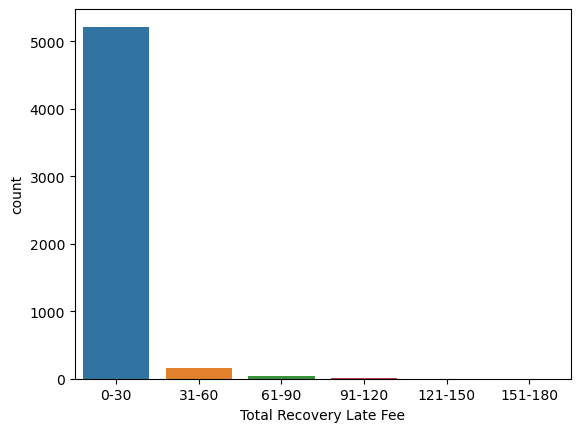

In [508]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='total_rec_late_fee_b')
plt.xlabel('Total Recovery Late Fee')
plt.show()

##### Observation: Total Recover fee with 0-30 has most charged off accounts

In [514]:
df.total_rec_late_fee.value_counts()

0.000000     35804
15.000000      246
15.000000       57
30.000000       55
15.000000       46
             ...  
14.981525        1
25.430000        1
14.924000        1
14.990736        1
19.890000        1
Name: total_rec_late_fee, Length: 1273, dtype: int64

#### sub plotting graph for open_acc_b, revol_util_b, total_acc_b, annual_inc_b

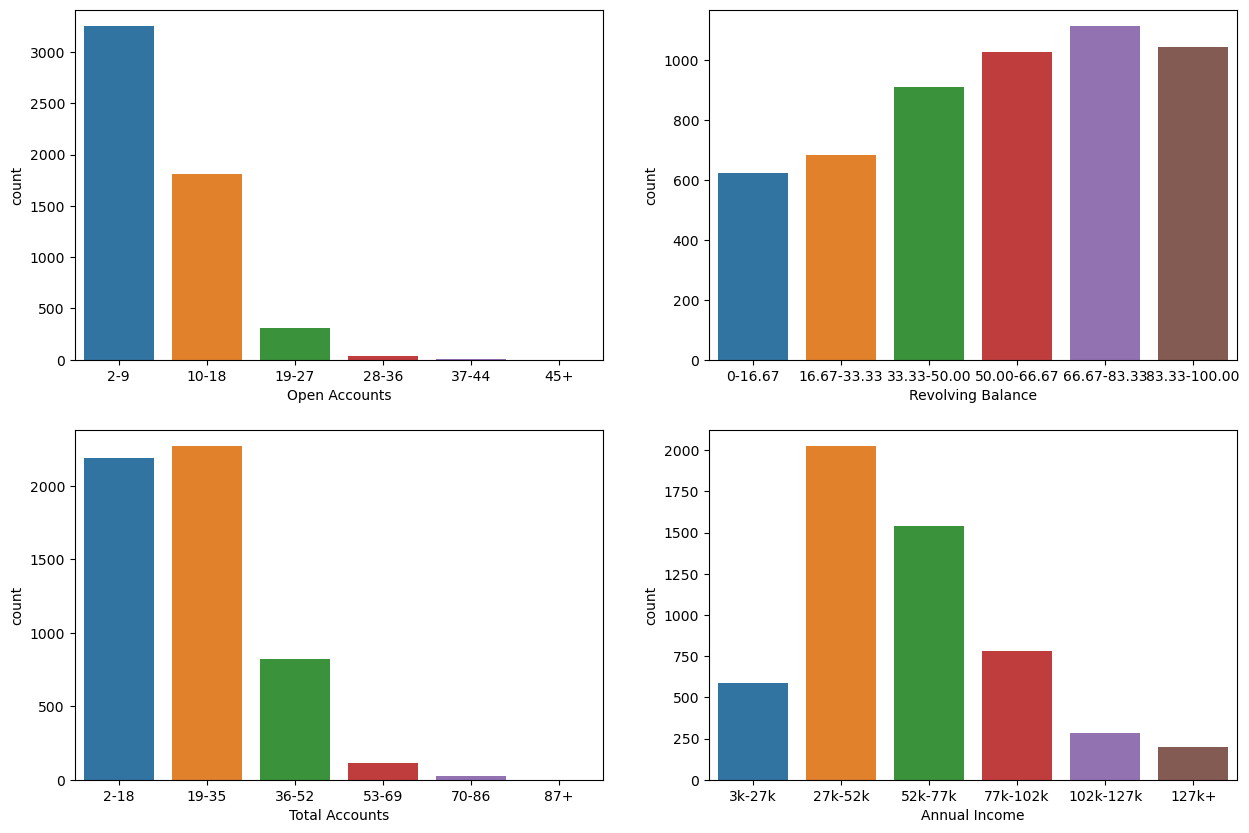

In [517]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='open_acc_b')
plt.xlabel('Open Accounts')
plt.subplot(222)
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='revol_util_b')
plt.xlabel('Revolving Balance')
plt.subplot(223)
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='total_acc_b')
plt.xlabel('Total Accounts')
plt.subplot(224)
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='annual_inc_b')
plt.xlabel('Annual Income')
plt.show()

##### Observation: It can be inferred that below have higher chances of defaulting
1. Income between 27K - 77K
2. Total accounts between 2-35
3. Open accounts between 2-18
4. Higher the revolving util rate higher the chances of defaulting
5. If there's Recovery late Fee (between 0-30)
6. If dti is between 12-18 and also secondly 18-24

### Let's visualize recoveries,inq_last_6mths for non-zero values

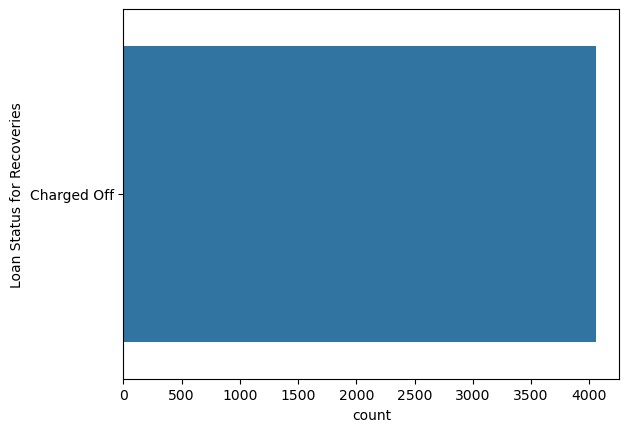

In [214]:
sns.countplot(data=df[df.recoveries!=0], y='loan_status')
plt.ylabel('Loan Status for Recoveries')
plt.show()

##### Observation: Accounts with recoveries having more than 0 are charged off accounts

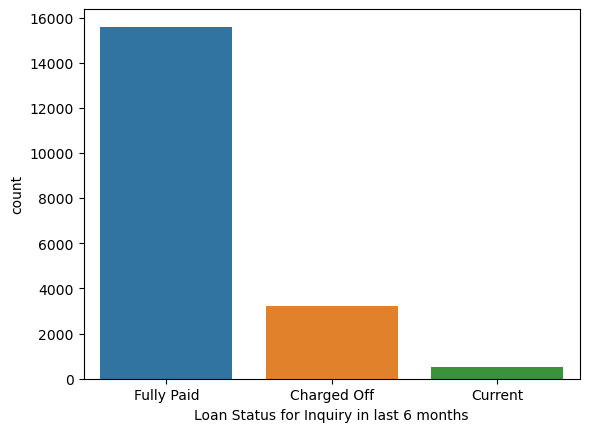

In [534]:
sns.countplot(data=df[df.inq_last_6mths != 0], x='loan_status')
plt.xlabel('Loan Status for Inquiry in last 6 months')
plt.show()

##### Observation: Accounts with inquiry in last 6 months tend to be Fully paid , mostly for our study it looks like charged off than current

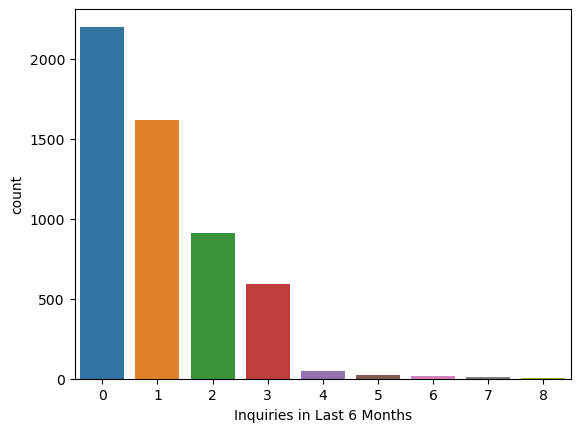

In [535]:
#Visualize inq_last_6mths for any patterns
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='inq_last_6mths')
plt.xlabel('Inquiries in Last 6 Months')
plt.show()

##### Observation: Accounts with 0 inquiries in last 6 months have defauited more than other defaulters

### installment

In [520]:
df.installment.describe()

count    37743.000000
mean       313.919193
std        199.548080
min         15.690000
25%        163.960000
50%        273.100000
75%        412.150000
max       1305.190000
Name: installment, dtype: float64

In [521]:
#binning installment to observer any pattern
df['installment_b'] = pd.cut(df['installment'], bins=10, labels=['14-145','145-274','274-403','403-532','532-661','661-790','790-919','919-1048','1048-1177','1177-1305'])


In [522]:
df['installment_b'].value_counts()

145-274      11476
274-403       8909
14-145        7420
403-532       4895
532-661       2403
661-790       1311
790-919       1018
919-1048       175
1048-1177       95
1177-1305       41
Name: installment_b, dtype: int64

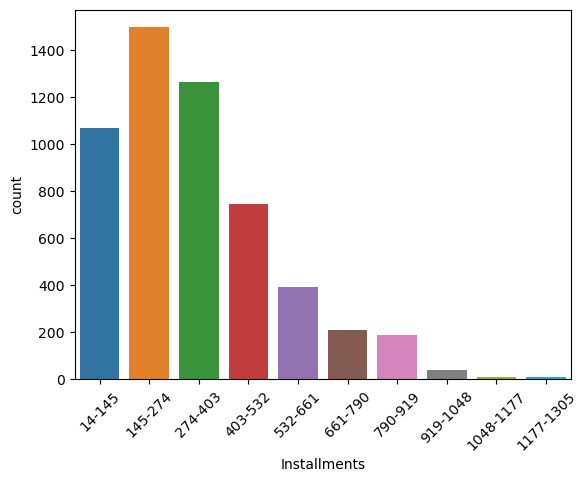

In [523]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='installment_b')
plt.xlabel('Installments')
plt.xticks(rotation=45)
plt.show()

##### Observation: Lower the installments that too if the installments are between 145-274 higher the chances of defaults

### loan_amnt

#### binning loan_amnt to observe the pattern

In [524]:
df.loan_amnt.min()

500

In [525]:
df.loan_amnt.max()

35000

In [526]:
df.loan_amnt.describe()

count    37743.000000
mean     10847.490925
std       7156.268085
min        500.000000
25%       5075.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [527]:
df['loan_amnt_b'] = pd.cut(df['loan_amnt'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


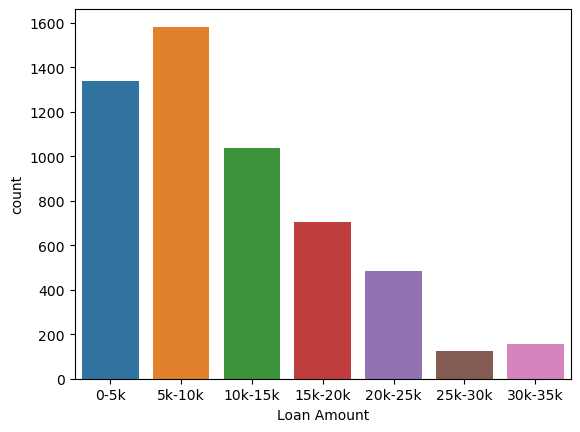

In [528]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='loan_amnt_b')
plt.xlabel('Loan Amount')
plt.show()

##### Observation: loan amounts with 5k -10k have more charged off/defaulters followed by 0-5k

### funded_amnt

#### Binning funded_amnt to see the patterns

In [529]:
df.funded_amnt.min()

500

In [530]:
df.funded_amnt.max()

35000

In [531]:
df.funded_amnt.describe()

count    37743.000000
mean     10593.457065
std       6898.086728
min        500.000000
25%       5000.000000
50%       9250.000000
75%      14575.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [532]:
df['funded_amnt_b'] = pd.cut(df['funded_amnt'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


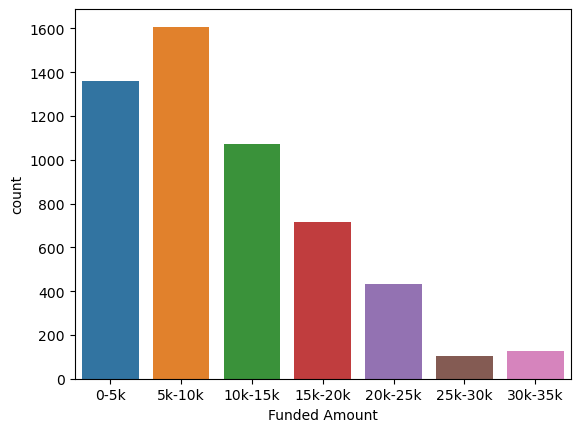

In [533]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='funded_amnt_b')
plt.xlabel('Funded Amount')
plt.show()

##### Observation: funded amount with 5k-10k have more defaulters followed by 0-5k

### pub_rec_bankruptcies

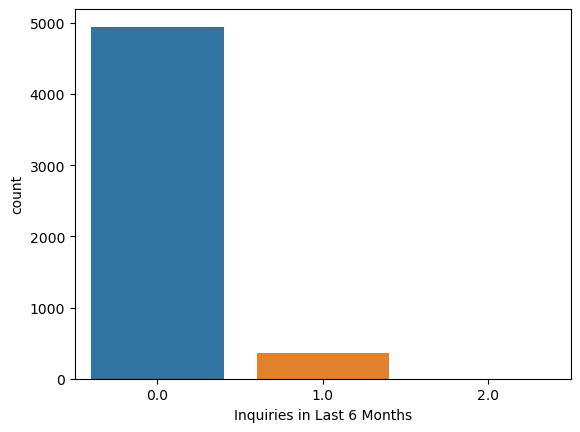

In [536]:
#visualize pub_rec_bankruptcies for any patterns
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='pub_rec_bankruptcies')
plt.xlabel('Inquiries in Last 6 Months')
plt.show()

##### Observation: accounts with 0 public bankruptcies have defaulted more than other defaulters

### verification_status

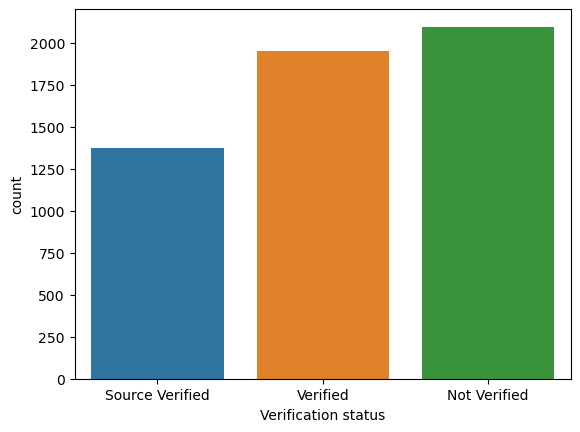

In [537]:
#visualizing verification_status
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='verification_status')
plt.xlabel('Verification status')
plt.show()

##### Observation: Not verified accounts tend to default more than others

### pub_rec

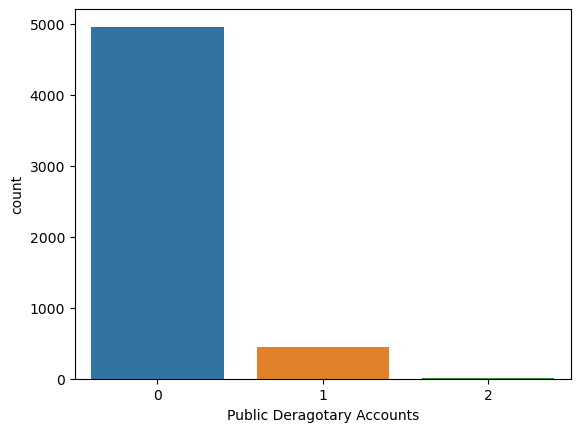

In [538]:
#visualizing pub_rec
sns.countplot(data = df[df['loan_status']=='Charged Off'], x='pub_rec' )
plt.xlabel('Public Deragotary Accounts')
plt.show()

##### Observation: Accounts with 0 deragatory records tend to default more than other defaulters

## Derive metrics from date columns

### month and year of issue date

In [539]:
#deriving the issue month, and issue year from the variable issue_d
df.issue_d.dtype

dtype('<M8[ns]')

In [540]:
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year
df[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,2011-12-01,12,2011
1,2011-12-01,12,2011
2,2011-12-01,12,2011
3,2011-12-01,12,2011
4,2011-12-01,12,2011


<function matplotlib.pyplot.show(close=None, block=None)>

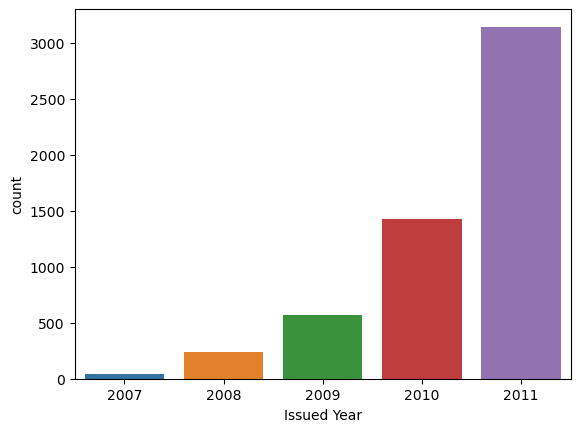

In [541]:
#Visualize the data based on year to see any patterns
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='issue_year')
plt.xlabel('Issued Year')
plt.show

##### Observation: Accounts have defaulted more in 2011 (that's when the recession peaked and affected most of the accounts)

<function matplotlib.pyplot.show(close=None, block=None)>

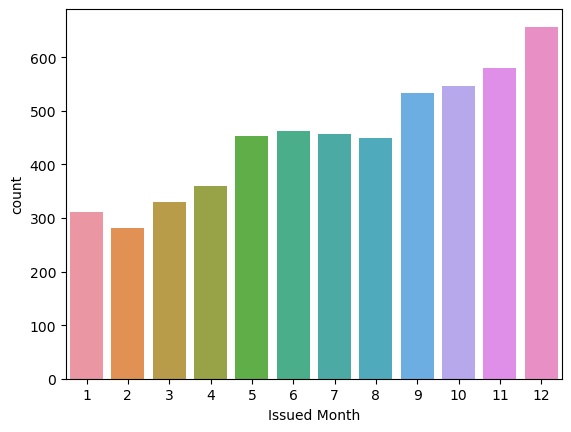

In [542]:
#Visualize the data based on  month to see any patterns
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='issue_month')
plt.xlabel('Issued Month')
plt.show

##### Observation: As we move to the end of the year, that is in the month(same order) December, November, October more accounts are getting defaulted

### Checking if total payment is less than funded amount

In [543]:
#Check for Condition of if total payment is less than funded amount
df[df['total_pymnt']<=df['funded_amnt']].loan_status.value_counts()

Charged Off    4697
Name: loan_status, dtype: int64

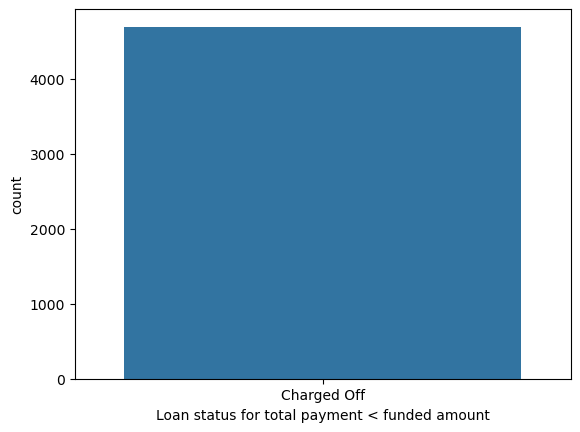

In [544]:
sns.countplot(data=df[df['total_pymnt']<=df['funded_amnt']], x='loan_status')
plt.xlabel('Loan status for total payment < funded amount')
plt.show()

##### Observation: Accounts which has not fully paid where in total payment is less than funded amount tend to have more defaulters, which is obvious but depends too for other cases

### Checking for if after the paying last payment, they had any credit inquiry

In [547]:
df[df['last_credit_pull_d'] > df['last_pymnt_d']].loan_status.value_counts()

Fully Paid     19646
Charged Off     5221
Current           40
Name: loan_status, dtype: int64

In [548]:
dfscope = df[df['last_credit_pull_d'] > df['last_pymnt_d']]

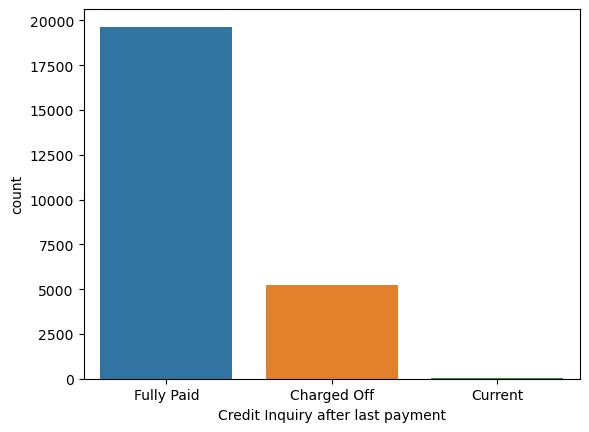

In [550]:
sns.countplot(data=dfscope, x='loan_status')
plt.xlabel('Credit Inquiry after last payment')
plt.show()

##### Observation: If a person has recent credit inquiry after his last payment date, chances are high for their defaulting

In [551]:
df.dtypes

loan_amnt           int64
funded_amnt         int64
term                int64
int_rate          float64
installment       float64
                   ...   
installment_b    category
loan_amnt_b      category
funded_amnt_b    category
issue_month         int64
issue_year          int64
Length: 51, dtype: object

## Co-Relation and Heat Map

In [559]:
column_corr = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'revol_bal','revol_util','total_pymnt','total_rec_prncp','recoveries']
column_corr

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'revol_bal',
 'revol_util',
 'total_pymnt',
 'total_rec_prncp',
 'recoveries']

In [560]:
corr_mat = df[column_corr].corr()
corr_mat

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,revol_bal,revol_util,total_pymnt,total_rec_prncp,recoveries
loan_amnt,1.000000,0.981785,0.298870,0.929565,0.156955,0.403487,0.094598,0.315364,0.072002,0.881790,0.845481,0.137561
funded_amnt,0.981785,1.000000,0.303541,0.955242,0.156614,0.399152,0.094043,0.307601,0.076272,0.898229,0.863291,0.139707
int_rate,0.298870,0.303541,1.000000,0.274431,0.003508,0.058830,0.113134,0.082842,0.469807,0.297093,0.175417,0.120712
installment,0.929565,0.955242,0.274431,1.000000,0.125937,0.399310,0.081863,0.307131,0.104100,0.852205,0.844371,0.120579
emp_length,0.156955,0.156614,0.003508,0.125937,1.000000,0.194676,0.061007,0.159673,0.011057,0.140899,0.130384,0.022082
annual_inc,0.403487,0.399152,0.058830,0.399310,0.194676,1.000000,-0.073506,0.398707,0.047514,0.381491,0.384102,0.039183
dti,0.094598,0.094043,0.113134,0.081863,0.061007,-0.073506,1.000000,0.272613,0.276690,0.092352,0.069109,0.025995
revol_bal,0.315364,0.307601,0.082842,0.307131,0.159673,0.398707,0.272613,1.000000,0.316000,0.286148,0.274611,0.044551
revol_util,0.072002,0.076272,0.469807,0.104100,0.011057,0.047514,0.276690,0.316000,1.000000,0.084386,0.030998,0.048359
total_pymnt,0.881790,0.898229,0.297093,0.852205,0.140899,0.381491,0.092352,0.286148,0.084386,1.000000,0.971404,0.025789


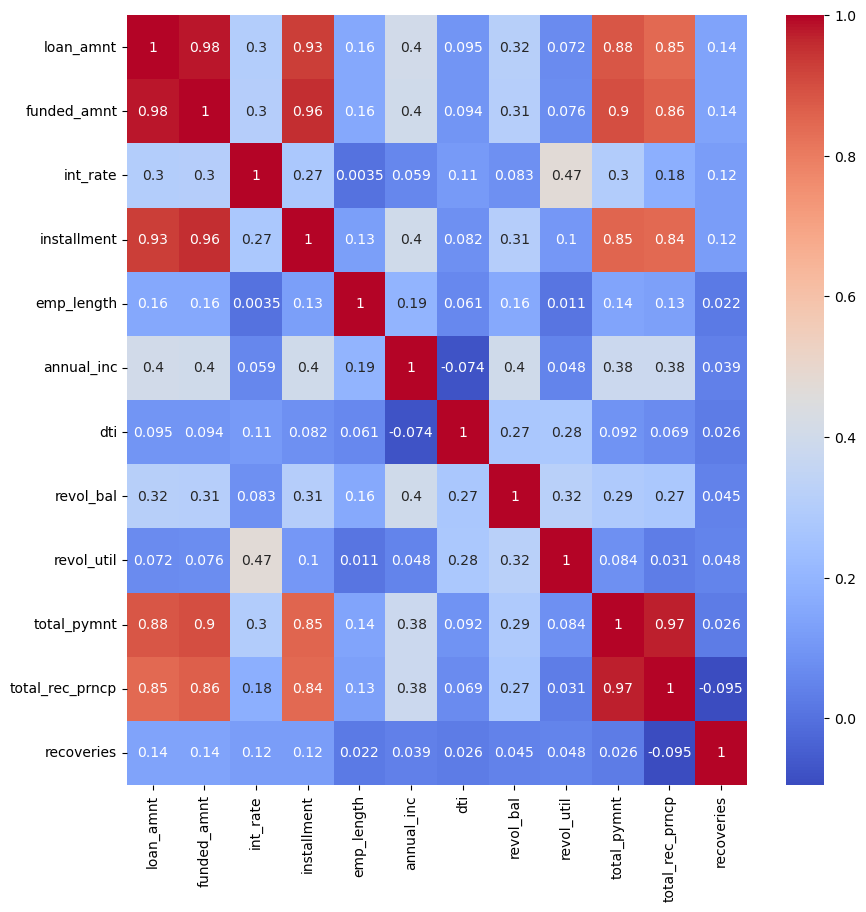

In [554]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

##### Observation: Below mentioned pairs have high co-relation
1. loan_amnt & funded_amnt
2. loan_amnt & installment
3. funded_amnt & installment

## Bi-Variate analysis for loan_amnt, annual_inc, dti

### emp_length

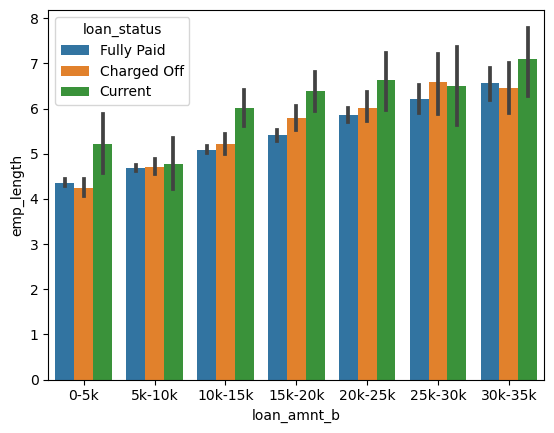

In [576]:
#loan_amnt vs emp_length
sns.barplot(data=df, x='loan_amnt_b', y='emp_length', hue='loan_status')
plt.show()

##### Observation: Accounts with emp_length 6-7 and loan_amnt between 30k-35k have more defaulters

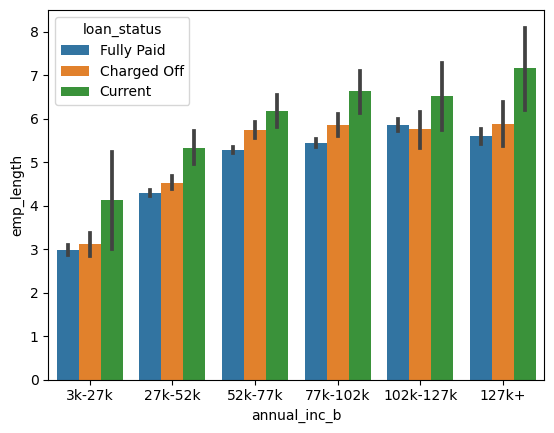

In [578]:
#annual_inc vs emp_length
sns.barplot(data=df, x='annual_inc_b', y='emp_length', hue='loan_status')
plt.show()

##### Observation: Accounts with emp_length between 5-7 and annual_inc 127k+ have more defaulters

### grade

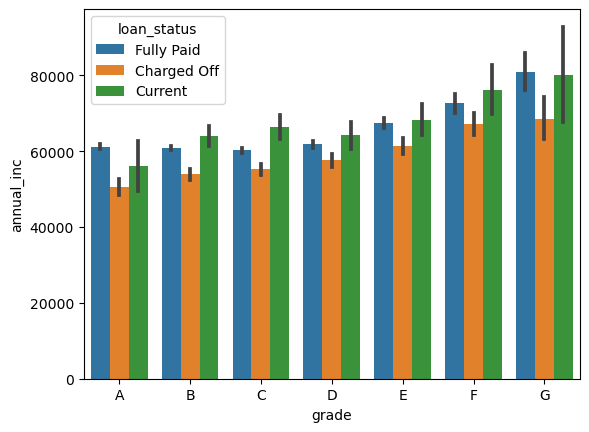

In [579]:
#annual_inc vs grade
sns.barplot(data=df, x='grade', y='annual_inc', order=['A','B','C','D','E','F','G'],hue='loan_status')
plt.show()

##### Observation: accounts with G grade followed by F and annual_inc between 60k to 80k have more defaulters

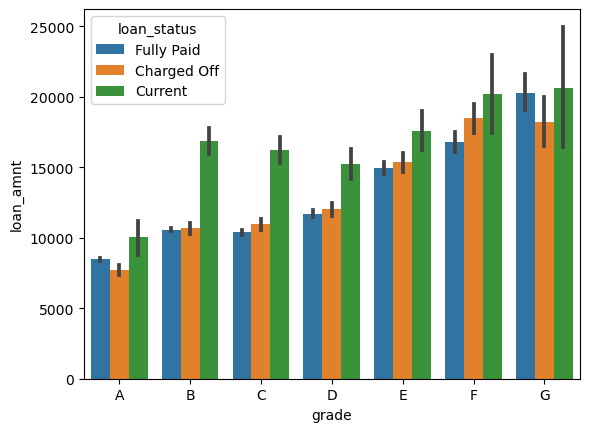

In [580]:
#loan_amnt vs grade
sns.barplot(data=df, x='grade', y='loan_amnt', order=['A','B','C','D','E','F','G'],hue='loan_status')
plt.show()

##### Observation: accounts with G grade and loan_amnt between 15K to 20k have more defaulters

### home_ownership

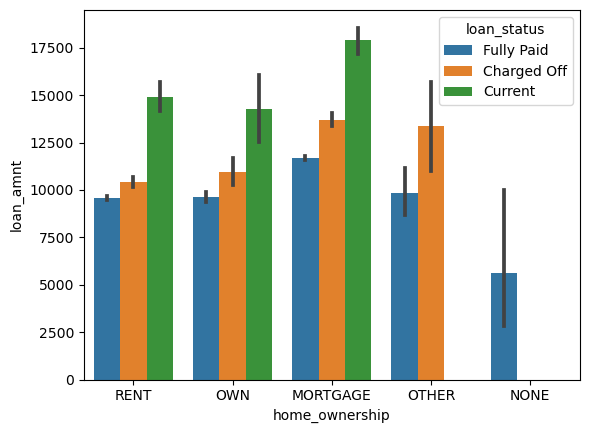

In [581]:
#loan_amnt vs home_ownership
sns.barplot(data=df, x='home_ownership', y='loan_amnt', hue='loan_status')
plt.show()

##### Observation: Accounts with loan_amnt between 10k -17.5k and home ownership as mortgage has more defaulters

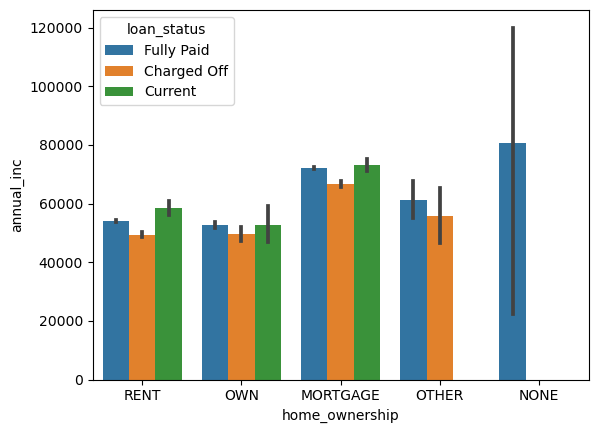

In [582]:
#annual_inc vs home_ownership
sns.barplot(data=df, x='home_ownership', y='annual_inc', hue='loan_status')
plt.show()

##### Observation: accounts with annual_inc between 40k-60k and homeownership as Mortgage has more defaulters

### verification_status

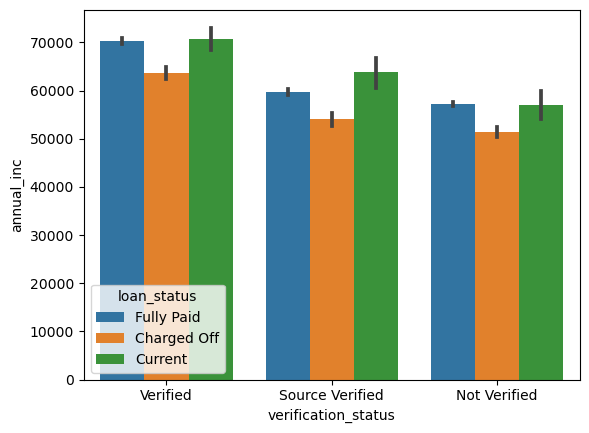

In [585]:
#verification_status vs annual_inc
sns.barplot(data=df, x='verification_status', y='annual_inc', hue='loan_status')
plt.show()

##### Observation: Accounts hwich are verified and annual_inc between 60k - 70k have more defaulters

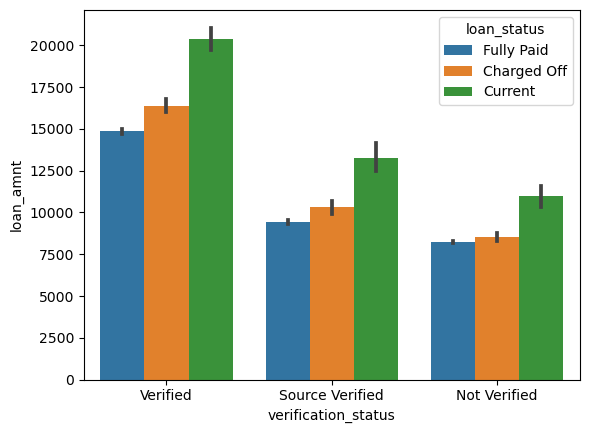

In [584]:
#verification_status vs loan_amnt
sns.barplot(data=df, x='verification_status', y='loan_amnt', hue='loan_status')
plt.show()

##### Observation: Accounts hwich are verified and loan_amnt between 15k - 17.5k have more defaulters

### purpose

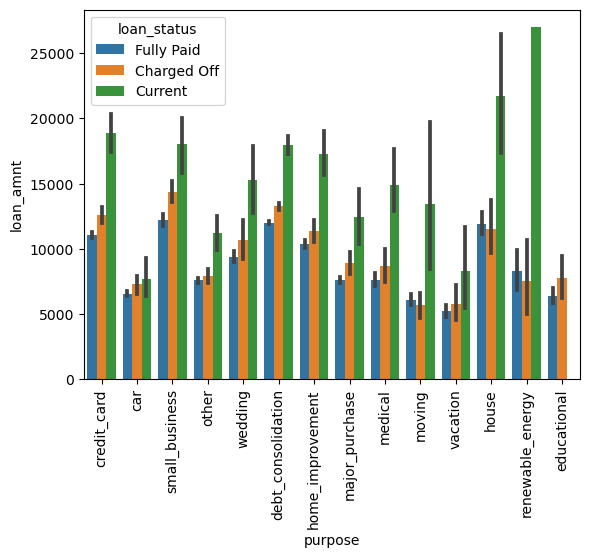

In [586]:
#purpose vs loan_amnt
sns.barplot(data=df, x='purpose', y='loan_amnt', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

##### Observation: accounts with purpose as small business, followed by debt consolidation and loan_amnt between 10k-15k have more defaulters

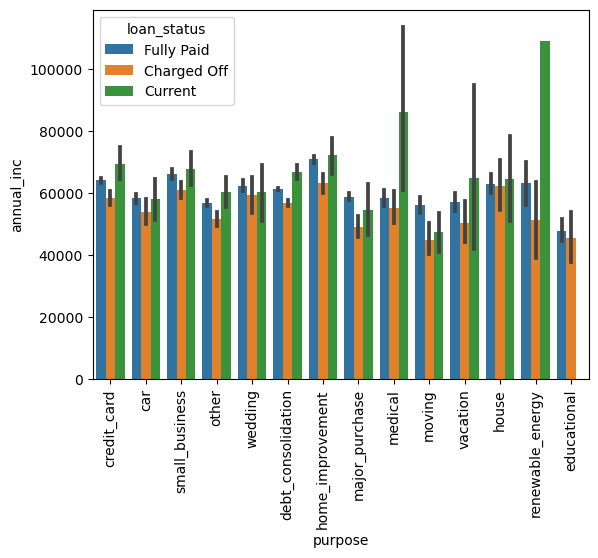

In [573]:
#purpose vs annual_inc
sns.barplot(data=df, x='purpose', y='annual_inc', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

##### Observation: accounts with purpose as  home improvement followed by debt consolidation,small business, wedding and annual_inc between 60k-65k have more defaulters

### grade

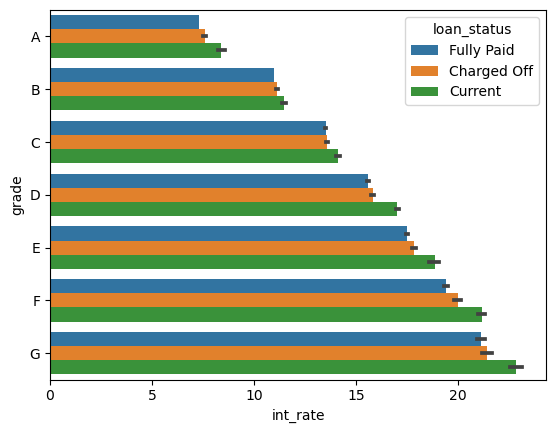

In [588]:
#int_rate vs grade
sns.barplot(data=df, x='int_rate', y='grade', order=['A','B','C','D','E','F','G'],hue='loan_status')
plt.show()


##### Observation: Accounts with grade G and int_rate more than 20 tend to have chances of defaulting

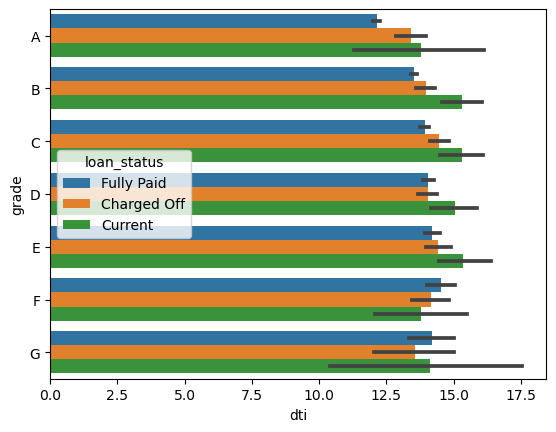

In [589]:
#dti vs grade
sns.barplot(data=df, x='dti', y='grade', order=['A','B','C','D','E','F','G'],hue='loan_status')
plt.show()

##### Observation: Accounts with grade C and dti as 12.5 have more defaulters

## Multi Variate Analysis

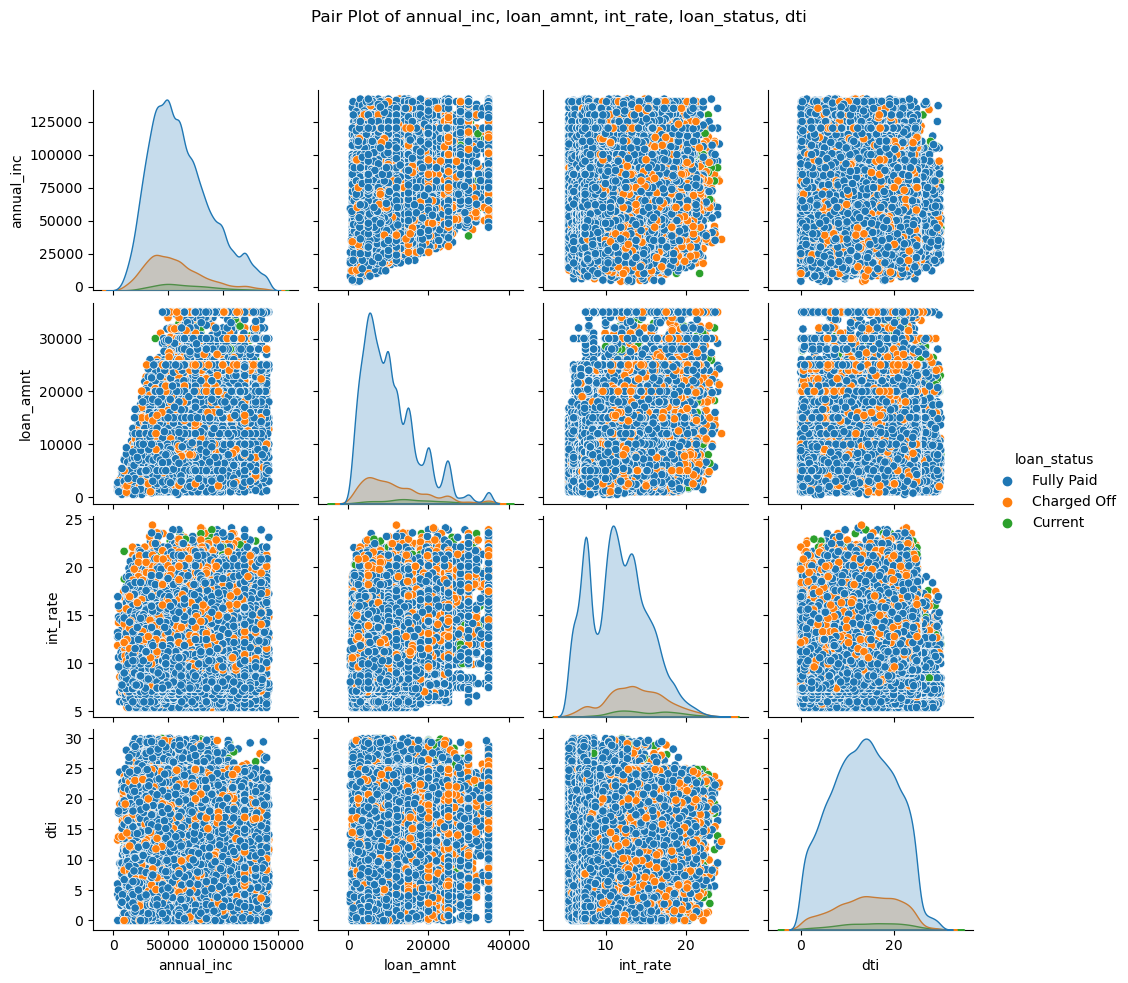

In [592]:
#let's take four variables annual_inc, loan_amnt, int_rate, loan_status, dti for this

multi = df[['annual_inc','loan_amnt','int_rate','loan_status','dti']]
sns.pairplot(multi, hue='loan_status')
fig = plt.gcf()
fig.subplots_adjust(top=0.9)
plt.suptitle("Pair Plot of annual_inc, loan_amnt, int_rate, loan_status, dti")
plt.show()

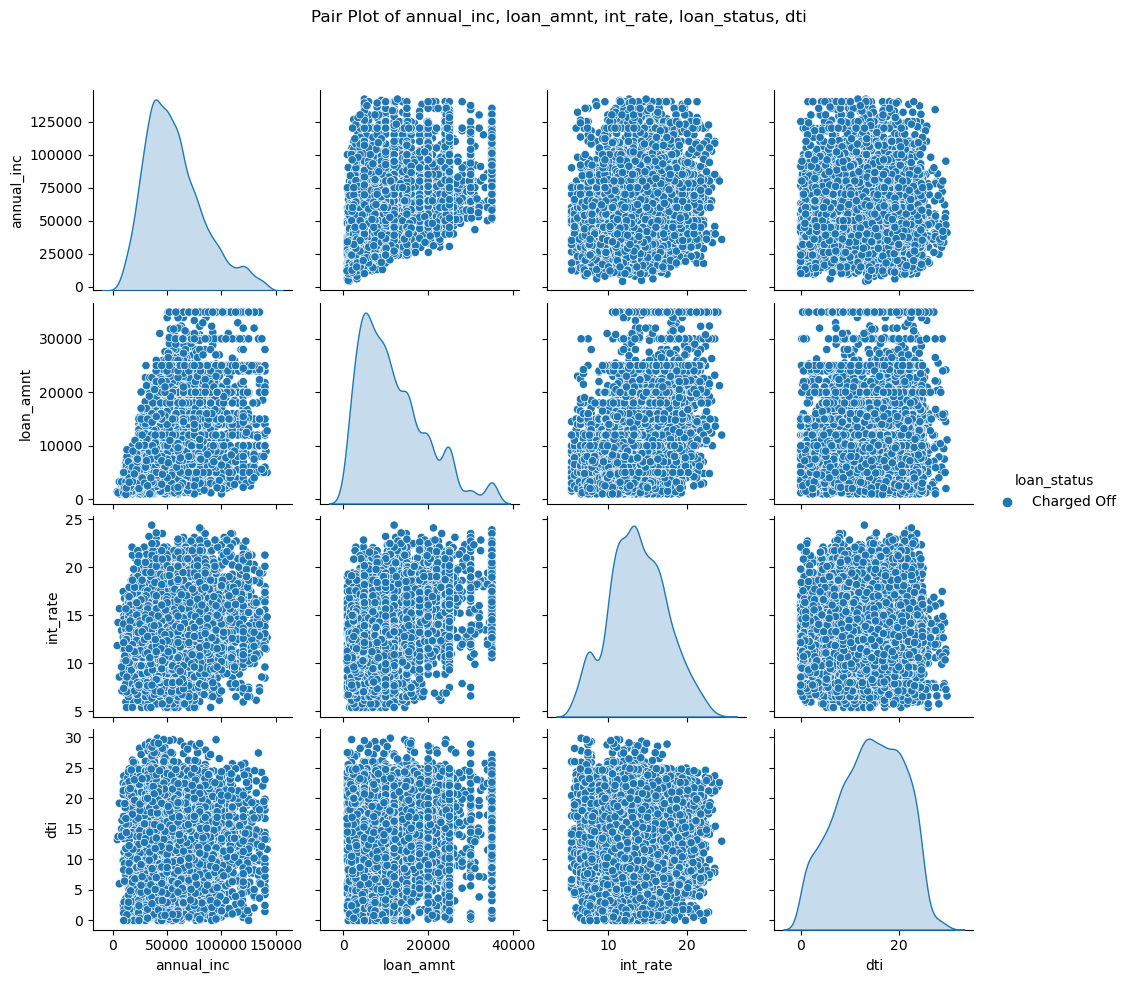

In [593]:
df1 = df[df['loan_status'] == 'Charged Off']
multi = df1[['annual_inc','loan_amnt','int_rate','loan_status','dti']]
sns.pairplot(multi, hue='loan_status')
fig = plt.gcf()
fig.subplots_adjust(top=0.9)
plt.suptitle("Pair Plot of annual_inc, loan_amnt, int_rate, loan_status, dti")
plt.show()

##### Observation: We can infer below points based on above pairplots
1. As interest rate increases, we can see increase in Charged off accounts and also the loan ammount
2. Those with low income and high interest rate tend to default more than others
3. As annual income increases, there's increase in loan ammount too, not fully but there's a probable relation

## Final Observation 
    The comprehensive analysis of the Lending Club's Loan dataset encompassing uni-variate, bi-variate, correlatoion and multivariate analysis is as below:

### Uni Variate Analysis

1. Looks like Charged Off accounts are 1/7th of the other two combined
2. Records with grades and sub-grades B(5,3,4) have more charged off accounts
3. More charged_off accounts are with B, A grades respectively
4. Not much but can say from above graph that emp_title as US Army has more charged off accounts
5. We can see that loan takers with home ownership as Rent and mortgage looks to default more than others
6. It looks like puprose with debt_consolidation has higher charge off accounts
7. As Zip_code is masked it's of no use to our analysis and also it's encoded data, let's drop it
8. People who live in states in order California, Florida, New York, and New Jersey tend to default more than others
9. Records with their employment length greater than 10 years are more prone to default than others
10. More defaulters took loan with less term i.e, 36 months rather than 60 months, not fully logical yet
11. loan takers with interest rate between 13%-17% are higher with defaulters than others
12. dti with 12-18 has most chraged off accounts/defaulters
13. If dti is between 12-18 and also secondly 18-24
14. Income between 27K - 77K
15. Total accounts between 2-35
16. Open accounts between 2-18
17. Higher the revolving util rate higher the chances of defaulting
18. If there's Recovery late Fee (between 0-30)
19. Total Recover fee in between 0-30 has most charged off accounts
20. Accounts with recoveries having more than 0 are charged off accounts
21. Accounts with inquiry in last 6 months tend to be Fully paid , mostly for our study it looks like charged off than current
22. Accounts with 0 inquiries in last 6 months have defauited more than other defaulters
23. Lower the installments that too if the installments are between 145-274 higher the chances of defaults
24. loan amounts with 5k -10k have more charged off/defaulters followed by 0-5k
25. funded amount with 5k-10k have more defaulters followed by 0-5k
26. accounts with 0 public bankruptcies have defaulted more than other defaulters
27. Not verified accounts tend to default more than others
28. Accounts with 0 deragatory records tend to default more than other defaulters
29. Accounts have defaulted more in 2011 (that's when the recession peaked and affected most of the accounts). Loans given during recession or peak recession tend to be very risky
30. As we move to the end of the year, that is in the month(same order) December, November, October more accounts are getting defaulted
31. Accounts which has not fully paid where in total payment is less than funded amount tend to have more defaulters, which is obvious but depends too for other cases
32. If a person has recent credit inquiry after his last payment date, chances are high for their defaulting

### Co-Relation:

1. Below mentioned pairs have high co-relation 1. loan_amnt & funded_amnt 2. loan_amnt & installment 3. funded_amnt & installment

### Bi-Variate Analysis:

1. Accounts with emp_length 6-7 and loan_amnt between 30k-35k have more defaulters
2. Accounts with emp_length between 5-7 and annual_inc 127k+ have more defaulters
3. accounts with G grade followed by F and annual_inc between 60k to 80k have more defaulters
4. accounts with G grade and loan_amnt between 15K to 20k have more defaulters
5. Accounts with loan_amnt between 10k -17.5k and home ownership as mortgage has more defaulters
6. accounts with annual_inc between 40k-60k and homeownership as Mortgage has more defaulters
7. Accounts hwich are verified and annual_inc between 60k - 70k have more defaulters
8. Accounts hwich are verified and loan_amnt between 15k - 17.5k have more defaulters
9. accounts with purpose as small business, followed by debt consolidation and loan_amnt between 10k-15k have more defaulters
10. accounts with purpose as home improvement followed by debt consolidation,small business, wedding and annual_inc between 60k-65k have more defaulters
11. Accounts with grade G and int_rate more than 20 tend to have chances of defaulting
12. Accounts with grade C and dti as 12.5 have more defaulters

### Multi-Variate Analysis:

1. As interest rate increases, we can see increase in Charged off accounts and also the loan ammount
2. Those with low income and high interest rate tend to default more than others
3. As annual income increases, there's increase in loan ammount too, not fully but there's a probable relation


## Driving Patterns/Variables

Below are the driving variables along with their patterns

* Employment Length: Accounts with employment lengths greater than 10 years are more prone to default than others.
* Home Ownership: Borrowers with home ownership as "Rent" and "Mortgage" are more likely to default compared to other categories.
* Loan Purpose: Loans with the purpose of "Debt Consolidation" tend to have higher charge-off accounts.
* State: Borrowers residing in states such as California, Florida, New York, and New Jersey tend to default more than those in other states.
* Interest Rate: Borrowers with interest rates between 13%-17% are more likely to default.
* Debt-to-Income Ratio (DTI): Borrowers with DTI between 12-18 have a higher number of charged-off accounts.
* Annual Income: Borrowers with annual incomes between 27K - 77K tend to default more.
* Total Accounts and Open Accounts: Borrowers with total accounts between 2-35 and open accounts between 2-18 are more likely to default.
* Revolving Utilization Rate: Higher revolving utilization rates are associated with a higher likelihood of default.
* Recovery Late Fee and Recovery Fee: Accounts with recovery late fees and recovery fees in the range of 0-30 tend to have more charged-off accounts.
* Bankruptcies: Accounts with 0 public bankruptcies tend to default more than others.
* Verification Status: Accounts marked as "Not Verified" tend to default more than others.
* Derogatory Records: Accounts with 0 derogatory records tend to default more than others.
* Issue Date: Accounts that defaulted more in 2011, coinciding with the recession, had a significant impact and also the same goes for loans issued towards the last months of the year.
* Latest Credit Inquiries: Borrowers with recent credit inquiries after their last payment date are at a higher risk of defaulting.
* Correlation Analysis: Variables like loan_amnt, funded_amnt, and installment have high positive correlations, indicating their influence on each other.
* Annual Income and Interest Rate: Borrowers with low income and high interest rates tend to default more.
